In [1]:
import pandas as pd
import os, re, copy
from glob import glob
from reports import get_average_classification_report
pd.options.display.float_format = '{:.4f}'.format
from functools import reduce
pd.options.display.float_format = '{:.4f}'.format
import seaborn as sns

In [6]:
target_trained_with_nums = [50, 100, 200, 300, 400]
dirnames = sorted(glob(os.path.join('C:\DATA\ComBERT', 'results_spamFiltering', '-CM_EpochTuning', '*_seed4')))
len(dirnames)

56

In [14]:
dfs = []
for dirname in dirnames:
    test_company, model_name, method_name, epoch_num, seed_num = os.path.basename(dirname).split('_')
    
    records = []
    for target_trained_with_num in target_trained_with_nums:
        filepaths = glob(os.path.join(os.path.dirname(dirname), '{}_*'.format('_'.join([test_company, model_name, method_name, epoch_num])), \
                  'classification_report_train_{}.csv'.format(target_trained_with_num)))
        
        column_name = '_'.join([test_company, model_name, method_name, epoch_num])
        averaged_classification_report_df = get_average_classification_report([pd.read_csv(filepath) for filepath in filepaths])
        acc = 100*averaged_classification_report_df.filter(items = ['accuracy'], axis=0)['f1-score'].values[0]
        records.append((target_trained_with_num, acc))
    dfs.append(pd.DataFrame(records, columns=['trained_with', column_name]).sort_values(by=['trained_with']))

result = reduce(lambda df1,df2: pd.merge(df1,df2,on='trained_with'), dfs)
result.rename(columns = {'trained_with' : 'fine-tuning data size'}, inplace = True)
result.set_index('fine-tuning data size', inplace=True)
result.loc['Average'] = result.mean()

result

,testCompanyName=y_Araci_CM_epoch10,testCompanyName=y_Araci_CM_epoch11,testCompanyName=y_Araci_CM_epoch12,testCompanyName=y_Araci_CM_epoch13,testCompanyName=y_Araci_CM_epoch14,testCompanyName=y_Araci_CM_epoch15,testCompanyName=y_Araci_CM_epoch2,testCompanyName=y_Araci_CM_epoch3,testCompanyName=y_Araci_CM_epoch4,testCompanyName=y_Araci_CM_epoch5,...,testCompanyName=y_Yang_CM_epoch14,testCompanyName=y_Yang_CM_epoch15,testCompanyName=y_Yang_CM_epoch2,testCompanyName=y_Yang_CM_epoch3,testCompanyName=y_Yang_CM_epoch4,testCompanyName=y_Yang_CM_epoch5,testCompanyName=y_Yang_CM_epoch6,testCompanyName=y_Yang_CM_epoch7,testCompanyName=y_Yang_CM_epoch8,testCompanyName=y_Yang_CM_epoch9
fine-tuning data size,,,,,,,,,,,,,,,,,,,,,
50,58.3000,55.5800,59.7400,56.2200,62.5200,61.7600,43.5600,48.5600,48.1600,53.7400,...,65.3800,64.0800,49.1400,56.2000,50.9200,45.8800,58.2000,58.8800,57.7200,56.0200
100,74.2200,74.3400,73.3400,73.0000,72.8400,72.0400,50.3000,54.6200,55.4800,59.7200,...,76.1600,76.1800,47.8400,59.9000,59.8600,53.6800,65.3200,68.5000,69.7000,70.7000
200,78.8200,79.1400,76.5400,78.3200,77.8000,78.6200,53.2600,68.2400,67.3600,72.7800,...,78.4200,79.6800,46.1200,70.5800,71.8800,72.3400,76.5600,77.6200,78.3600,79.0600
300,80.1800,79.7400,78.3400,80.4000,79.3600,80.1200,57.3000,72.7600,76.8200,75.6200,...,81.0600,80.4000,58.3200,75.3200,79.0600,79.4600,80.1400,80.4400,79.0200,80.0600
400,78.8600,75.7800,79.7000,79.0200,78.4600,79.5400,62.2200,78.1000,78.9000,78.9400,...,80.6200,79.9800,68.0400,76.3600,80.5000,79.8600,79.1000,79.9400,78.9400,79.3200
Average,74.0760,72.9160,73.5320,73.3920,74.1960,74.4160,53.3280,64.4560,65.3440,68.1600,...,76.3280,76.0640,53.8920,67.6720,68.4440,66.2440,71.8640,73.0760,72.7480,73.0320


### Graphical comparison of accuracy scores in settings with varying number of epochs
* We varied the number of epochs from 2 to 15 and recorded the average performance (i.e., spam tweet classification accuracy) of the four models—BERT, Araci's FinBERT, Huang's FinBERT, and SEC-BERT that were post-trained with the proposed company name masking method—on the test dataset containing company names. 
* In an environment using fine-tuning data with 50 samples, a sharp drop in performance was observed when the number of epochs was set to eight; thus, we decided to fix the maximum number of epochs as seven and conduct an experiment to compare the performance between the baseline methods and the proposed method. 
* We note that the main purpose of this study is not to achieve the highest level of spam filtering performance, but to observe and analyze whether there is a performance difference between existing methods and the proposed method depending on the number of fine-tuning data.

,2,2,2,2,3,3,3,3,4,4,...,13,13,14,14,14,14,15,15,15,15
fine-tuning data size,,,,,,,,,,,,,,,,,,,,,
50,43.5600,51.3600,50.0000,49.1400,48.5600,49.7200,50.0000,56.2000,48.1600,45.7200,...,55.4200,68.6600,62.5200,60.9400,57.1200,65.3800,61.7600,61.5000,61.9600,64.0800
100,50.3000,52.4400,50.0400,47.8400,54.6200,52.7800,50.2400,59.9000,55.4800,53.4800,...,74.5400,76.5600,72.8400,74.7200,74.3200,76.1600,72.0400,75.3600,76.3800,76.1800
200,53.2600,60.4000,56.3400,46.1200,68.2400,62.7600,62.5600,70.5800,67.3600,64.2600,...,78.6600,78.9000,77.8000,78.4400,79.7400,78.4200,78.6200,77.3400,80.4200,79.6800
300,57.3000,65.6800,65.6800,58.3200,72.7600,69.8600,71.4600,75.3200,76.8200,72.1800,...,80.9600,79.8800,79.3600,81.0000,80.7600,81.0600,80.1200,77.6600,80.8000,80.4000
400,62.2200,71.6200,73.6800,68.0400,78.1000,73.7600,78.8200,76.3600,78.9000,77.4600,...,79.8800,80.8400,78.4600,79.8600,80.9200,80.6200,79.5400,79.3800,80.4800,79.9800
Average,53.3280,60.3000,59.1480,53.8920,64.4560,61.7760,62.6160,67.6720,65.3440,62.6200,...,73.8920,76.9680,74.1960,74.9920,74.5720,76.3280,74.4160,74.2480,76.0080,76.0640


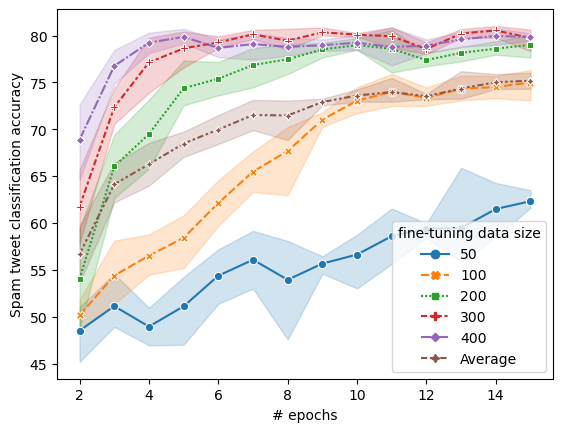

In [21]:
result2 = copy.copy(result)

result2.columns = [int(item.split('_')[-1].replace("epoch", "")) for item in result2.columns]
result2 = result2[sorted(set(result2.columns))]

ax = sns.lineplot(data=result2.transpose(), markers=True)
ax.set(xlabel='# epochs', ylabel='Spam tweet classification accuracy')
result2

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
fine-tuning data size,,,,,,,,,,,,,,
50,48.5150,51.1200,48.9450,51.1050,54.3700,56.0750,53.9400,55.6650,56.6300,58.5900,59.3800,59.4650,61.4900,62.3250
100,50.1550,54.3850,56.5100,58.4150,62.1250,65.4800,67.6800,71.0200,73.0500,74.0000,73.3550,74.3250,74.5100,74.9900
200,54.0300,66.0350,69.4900,74.3800,75.4000,76.8500,77.4750,78.5250,78.9800,78.5900,77.3850,78.1600,78.6000,79.0150
300,61.7450,72.3500,77.1350,78.6350,79.2650,80.1200,79.4550,80.3500,80.0950,79.9250,78.5700,80.2150,80.5450,79.7450
400,68.8900,76.7600,79.2450,79.8600,78.6850,79.0950,78.7950,78.9700,79.2450,78.7750,78.9300,79.5900,79.9650,79.8450
Average,56.6670,64.1300,66.2650,68.4790,69.9690,71.5240,71.4690,72.9060,73.6000,73.9760,73.5240,74.3510,75.0220,75.1840


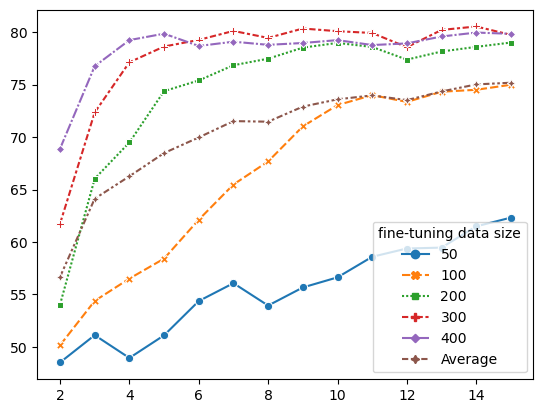

In [22]:
dfs = []
for colname in set([item.split('_')[-1] for item in result.columns]):
    dfs.append(pd.DataFrame(result[[item for item in result.columns if item.split('_')[-1] == colname]].mean(axis=1), \
                            columns=[colname]))
    
average_result = reduce(lambda df1,df2: pd.merge(df1,df2,on='fine-tuning data size'), dfs)

average_result.columns = [int(item.replace("epoch", "")) for item in average_result.columns]
average_result = average_result[sorted(average_result.columns)]

ax = sns.lineplot(data=average_result.transpose(), markers=True)
ax.set(xlabel='# epochs', ylabel='Spam tweet classification accuracy')
average_result

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
fine-tuning data size,,,,,,,,,,,,,,
50,51.3600,49.7200,45.7200,54.4200,54.1200,51.9000,58.4400,55.9200,57.9600,61.9800,57.8800,57.5600,60.9400,61.5000
100,52.4400,52.7800,53.4800,61.4800,60.9200,65.0200,70.2200,69.9800,71.0600,71.4200,72.4200,73.2000,74.7200,75.3600
200,60.4000,62.7600,64.2600,73.5400,74.5200,73.4200,75.6400,77.1800,78.4000,75.0200,76.9400,76.7600,78.4400,77.3400
300,65.6800,69.8600,72.1800,78.3200,78.5000,79.5800,79.2600,80.2400,79.7600,78.2200,78.6200,79.6200,81.0000,77.6600
400,71.6200,73.7600,77.4600,79.5200,78.4400,78.8800,77.5000,78.5400,78.0600,78.2000,79.4600,78.6200,79.8600,79.3800
Average,60.3000,61.7760,62.6200,69.4560,69.3000,69.7600,72.2120,72.3720,73.0480,72.9680,73.0640,73.1520,74.9920,74.2480


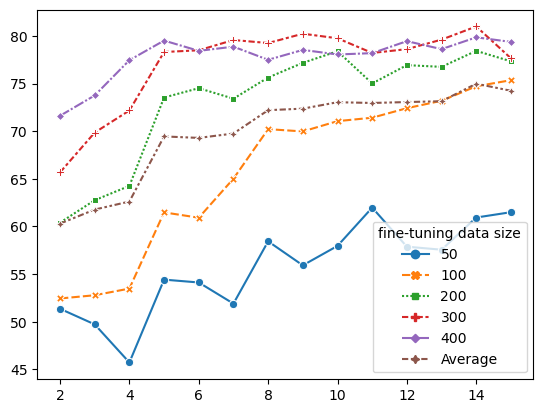

In [17]:
def show_plot(model_name):
    one_model_result = result[[col for col in result.columns if model_name in col]]
    one_model_result.columns = [int(item.split('_')[-1].replace("epoch", "")) for item in one_model_result.columns]
    one_model_result = one_model_result[sorted(one_model_result.columns)]
    
    sns.lineplot(data=one_model_result.transpose(), markers=True)
    return one_model_result

show_plot('_BERT_')

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
fine-tuning data size,,,,,,,,,,,,,,
50,43.5600,48.5600,48.1600,53.7400,50.1600,54.0800,44.1800,56.6200,58.3000,55.5800,59.7400,56.2200,62.5200,61.7600
100,50.3000,54.6200,55.4800,59.7200,58.4800,62.4000,60.5600,72.2000,74.2200,74.3400,73.3400,73.0000,72.8400,72.0400
200,53.2600,68.2400,67.3600,72.7800,72.7200,77.1800,76.1600,78.4600,78.8200,79.1400,76.5400,78.3200,77.8000,78.6200
300,57.3000,72.7600,76.8200,75.6200,79.1600,79.6800,78.2600,79.9600,80.1800,79.7400,78.3400,80.4000,79.3600,80.1200
400,62.2200,78.1000,78.9000,78.9400,77.2400,76.9400,78.5800,79.8400,78.8600,75.7800,79.7000,79.0200,78.4600,79.5400
Average,53.3280,64.4560,65.3440,68.1600,67.5520,70.0560,67.5480,73.4160,74.0760,72.9160,73.5320,73.3920,74.1960,74.4160


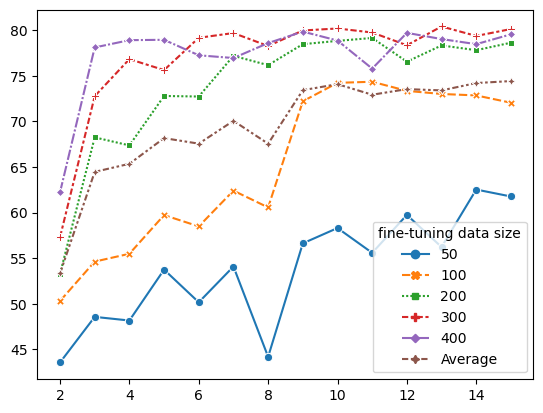

In [18]:
show_plot('Araci')

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
fine-tuning data size,,,,,,,,,,,,,,
50,49.1400,56.2000,50.9200,45.8800,58.2000,58.8800,57.7200,56.0200,59.0000,61.1200,59.9600,68.6600,65.3800,64.0800
100,47.8400,59.9000,59.8600,53.6800,65.3200,68.5000,69.7000,70.7000,74.5600,76.7000,72.5800,76.5600,76.1600,76.1800
200,46.1200,70.5800,71.8800,72.3400,76.5600,77.6200,78.3600,79.0600,78.5800,81.0800,77.3200,78.9000,78.4200,79.6800
300,58.3200,75.3200,79.0600,79.4600,80.1400,80.4400,79.0200,80.0600,80.1400,81.5400,79.4800,79.8800,81.0600,80.4000
400,68.0400,76.3600,80.5000,79.8600,79.1000,79.9400,78.9400,79.3200,79.9000,81.1800,78.9000,80.8400,80.6200,79.9800
Average,53.8920,67.6720,68.4440,66.2440,71.8640,73.0760,72.7480,73.0320,74.4360,76.3240,73.6480,76.9680,76.3280,76.0640


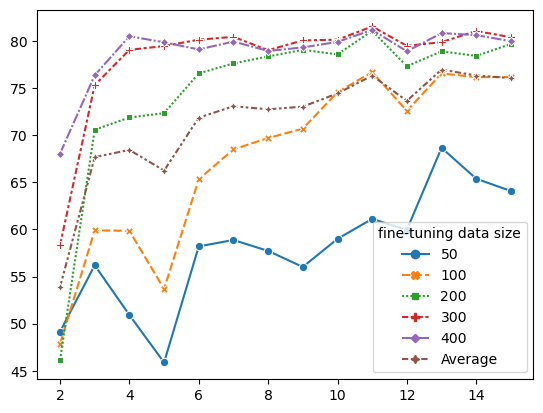

In [19]:
show_plot('Yang')

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
fine-tuning data size,,,,,,,,,,,,,,
50,50.0000,50.0000,50.9800,50.3800,55.0000,59.4400,55.4200,54.1000,51.2600,55.6800,59.9400,55.4200,57.1200,61.9600
100,50.0400,50.2400,57.2200,58.7800,63.7800,66.0000,70.2400,71.2000,72.3600,73.5400,75.0800,74.5400,74.3200,76.3800
200,56.3400,62.5600,74.4600,78.8600,77.8000,79.1800,79.7400,79.4000,80.1200,79.1200,78.7400,78.6600,79.7400,80.4200
300,65.6800,71.4600,80.4800,81.1400,79.2600,80.7800,81.2800,81.1400,80.3000,80.2000,77.8400,80.9600,80.7600,80.8000
400,73.6800,78.8200,80.1200,81.1200,79.9600,80.6200,80.1600,78.1800,80.1600,79.9400,77.6600,79.8800,80.9200,80.4800
Average,59.1480,62.6160,68.6520,70.0560,71.1600,73.2040,73.3680,72.8040,72.8400,73.6960,73.8520,73.8920,74.5720,76.0080


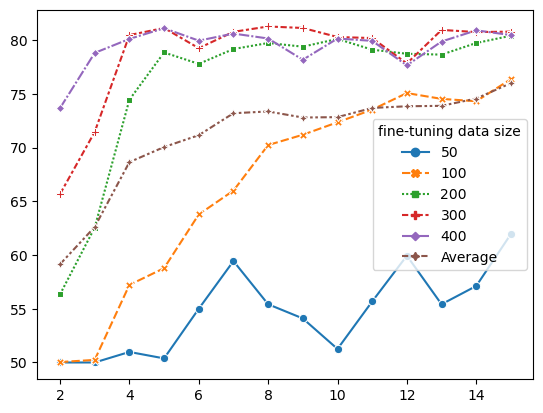

In [20]:
show_plot('SECBERT')